# DS4200 Homework 4

Due: Friday Nov 21st @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file included with the coding results and and two `png` files from the part 3 to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope.

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

## Part 1: Altair interactive plots

Gapminder is a non-profit organization that promotes global sustainable development and seeks to bridge the gap between misconceptions and data-driven understanding. We are going to explore the a small subset of its data with the information of average income, health score and population for each country in the world. The region information is also provided. 

In [1]:
import pandas as pd
import altair as alt

df = pd.read_csv("gapminder-health-income.csv")
df.head()

,country,income,health,population,region
0,Afghanistan,1925,57.63,32526562,south_asia
1,Albania,10620,76.00,2896679,europe_central_asia
2,Algeria,13434,76.50,39666519,middle_east_north_africa
3,Andorra,46577,84.10,70473,europe_central_asia
4,Angola,7615,61.00,25021974,sub_saharan_africa


### Part 1.1 Add selection (10 points)

Make a scatter plot to show the relationship between average personal income and average health score for each country. Use different colors for different regions. Also add tooltip to it to show the information about the country name and population. In the end, allow the user to select a single country to highlight while all the other become light grey. 

In [2]:
# interactive selection for country w/ click
highlight = alt.selection_single(fields=["country"], on="click", empty="all")

# income vs health scatterplot
alt.Chart(df).mark_circle().encode(
    x=alt.X("income", title="Income per person ($)"),
    y=alt.Y("health", title="Life expectancy (yrs)"),
    color=alt.condition(highlight, "region", alt.value("gray")),
    size=alt.Size("population", scale=alt.Scale(range=[30, 500]), title="Population"),
    tooltip=["country", "population"]).add_selection(highlight)

C:\Users\nawib\AppData\Local\Temp\ipykernel_22776\767464240.py:2: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use selection_point instead.
  highlight = alt.selection_single(fields=["country"], on="click", empty="all")
C:\Users\nawib\AppData\Local\Temp\ipykernel_22776\767464240.py:5: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  alt.Chart(df).mark_circle().encode(
C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. 

alt.Chart(...)

### Part 1.2 Customize the color (5 points)

Now choose a customized color map for the previous question. Explain how you choose the color map and apply it to the plot. Please do NOT use the pre-defined color palettes in matplotlib, instead, use the websites like Color Brewer or Colorgorical. You can use following line to include your own selected color list (legend_color is your color number list): 

    alt.Color('region:N', scale=alt.Scale(range=legend_color))

In [3]:
# colorgorical color palette
region_colors = ["#0cc0aa", "#fa557a", "#1e5c4a", "#7459bf", "#fcb2c7", "#56c23d"]

# scatter plot w/ new colors
(alt.Chart(df).mark_circle().encode(
    x=alt.X("income", title="Income per person ($)"),
    y=alt.Y("health", title="Life expectancy (yrs)"),
    color=alt.Color("region", scale=alt.Scale(range=region_colors)),
    size=alt.Size("population", scale=alt.Scale(range=[30, 500]), title="Population"),
    tooltip=["country", "population"])
    .properties(title="Income vs. Health by Region (Custom Colors)"))

C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_datafra

alt.Chart(...)

### Part 1.3 Select across multiple panels (5 points)

Instead of using the point selection, now add an interval selection to the figure in part 1.1, such that the user can select over any income range (only income range), and then generate a second plot on the right to show the relationship between income and population for the selected data (use filter, only show the selected data). 

In [4]:
# income brush
income_brush = alt.selection_interval(encodings=['x'])

# income vs health chart (w/ brush)
left = (alt.Chart(df).mark_circle().encode(
    x=alt.X("income", title="Income per person ($)"),
    y=alt.Y("health", title="Life expectancy (yrs)"),
    color="region",
    size=alt.Size("population", scale=alt.Scale(range=[30, 500]), title="Population"),
    tooltip=["country", "region", "income", "health", "population"])
    .add_selection(income_brush)
    .properties(
    title="Brush over Income Range"))

# income vs population (filtered by income)
right = (alt.Chart(df).mark_circle().encode(
    x=alt.X("income", title="Income per person ($)"),
    y=alt.Y("population", title="Population"),
    color="region",
    tooltip=["country", "income", "population"])
    .transform_filter(income_brush)
    .properties(
    title="Filtered by Income"))

# combine charts
left | right

C:\Users\nawib\AppData\Local\Temp\ipykernel_22776\3295252254.py:5: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  left = (alt.Chart(df).mark_circle().encode(
C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair

alt.HConcatChart(...)

### Part 1.4 Data binding (10 points)

Modified on the part 1.1 figure, instead of the using the legend, now include a radio button on the region such that each selection only highlights one region and make the other points to be grey. Also add the selection to the opacity such that only the selected region has a opacity value 1 while the other are 0.1. The default option should be "All".

In [5]:
# dropdown w/ all regions + ckosen
region_options = ['All'] + sorted(df['region'].unique())

# dropdown to parameter
region_filter = alt.param(
    name='RegionSelect',
    bind=alt.binding_select(options=region_options, name='Region: '),
    value='All'
)

# opacity for chosen region
opacity = alt.condition(
    "(RegionSelect == 'All') || (datum.region == RegionSelect)",
    alt.value(1),
    alt.value(0.1)
)

# chart w/ parameter
(alt.Chart(df).mark_circle().encode(
    x=alt.X("income", title="Income per person ($)"),
    y=alt.Y("health", title="Life expectancy (yrs)"),
    color=alt.Color("region", title="Region"),
    opacity=opacity,
    size=alt.Size("population", scale=alt.Scale(range=[30, 500]), title="Population"),
    tooltip=["country", "region", "income", "health", "population"])
    .add_params(region_filter)
    .properties(title="Highlight Selected Region (Others Dimmed)"))

C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_datafra

alt.Chart(...)

### Part 1.5 Add filter with bars (10 points)

Modified on the part 1.1 figure, add a slider bar such that for a given value on the bar, we only show the data such that the population of the country is less than the value. You can set the initial cutoff value as 1000000 and step size as 1000. 

In [6]:
# slider for pop
pop_slider = alt.binding_range(
    min=0,
    max=df["population"].max(),
    step=1000,
    name='Max population: '
)

# cutoff parameter
cutoff_param = alt.param(
    name='pop_cutoff',
    bind=pop_slider,
    value=1_000_000
)

# chart with slider and cutoff
(alt.Chart(df).mark_circle().encode(
    x=alt.X("income", title="Income per person ($)"),
    y=alt.Y("health", title="Life expectancy (yrs)"),
    color=alt.Color("region", title="Region"),
    size=alt.Size("population", scale=alt.Scale(range=[30, 500]), title="Population"),
    tooltip=["country", "population", "income", "health"])
    .transform_filter("datum.population < pop_cutoff")
    .add_params(cutoff_param)
    .properties(title="Countries with Population Below Slider Value"))

C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_datafra

alt.Chart(...)

### Part 2 Explore the TX population and unemployment rate
#### Part 2.1 Prepare the geospatial data (10 points)

On Canvas, there is a csv file called "unemp.csv", which contains county-level information about unemployment rate and population. Use county level geo-spatial data provided in the lecture to merge two datasets. Then extract the part of data for Texas and make a map for Texas county. Only show the boundary for the counties. Use Geopanda for question 2.1 to 2.3. 

Note: Texas has 254 counties, more than any other U.S. state.

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
unemp = pd.read_csv("unemp.csv")
unemp.head()

,Unnamed: 0,fips,pop,unemp
0,1,1001,23288,9.7
1,2,1003,81706,9.1
2,3,1005,9703,13.4
3,4,1007,8475,12.1
4,5,1009,25306,9.9


C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


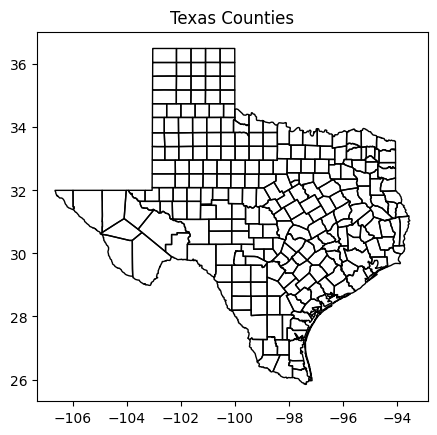

In [9]:
counties = gpd.read_file("ne_10m_admin_2_counties/ne_10m_admin_2_counties.shp")

# isolate texas from data
tx = counties[counties["REGION"] == "TX"]
tx["fips_str"] = tx["FIPS"].str[-5:]
unemp["fips_str"] = unemp["fips"].astype(str).str.zfill(5)

# merge datasets
tx = tx.merge(unemp[["fips_str", "pop", "unemp"]], on="fips_str", how="left")

# plot
tx.plot(edgecolor="black", facecolor="none")
plt.title("Texas Counties")
plt.show()

#### Part 2.2 Choropleth maps and customization (5 points)

Make a choropleth maps with unemployment rate. Choose another color map from
https://matplotlib.org/stable/users/explain/colors/colormaps.html. Give a title to the figure (use `plt.title`) as well as a title to the legend.

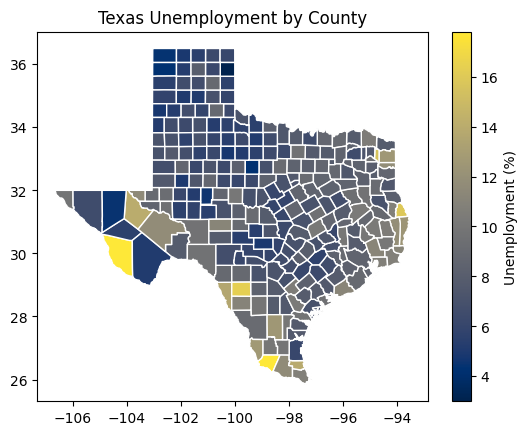

In [10]:
# choropleth for unemployment rate
tx.plot(column="unemp", cmap="cividis",
    edgecolor="white",
    legend=True,
    legend_kwds={"label": "Unemployment (%)"}
)

plt.title("Texas Unemployment by County")
plt.show()

#### Part 2.3 Handle the missing values (10 points)

Make a copy of your Texas data. Like what we have done in the lecture, randomly select 30 counties and set the unemployment rate as NaN. Plot the choropleth maps for the unemployment rate again. Define the color, boundary, and hatch pattern for the missing value areas. Also include a legend for the missing areas. Chooes a hatch pattern that is different from the lecture note from here: https://matplotlib.org/devdocs/gallery/shapes_and_collections/hatch_style_reference.html

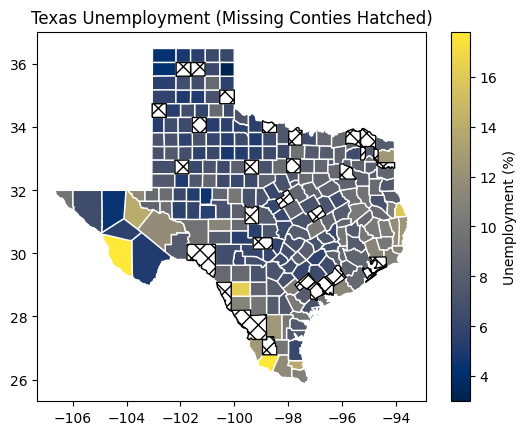

In [11]:
import random

# copy, add nan data
tx_missing = tx.copy()
random.seed(42)
missing_fips = random.sample(list(tx_missing["fips_str"]), 30)
tx_missing.loc[tx_missing["fips_str"].isin(missing_fips), "unemp"] = None

# split data
has_data = tx_missing[tx_missing["unemp"].notna()]
no_data = tx_missing[tx_missing["unemp"].isna()]

# plots
base = has_data.plot(column="unemp", cmap="cividis", edgecolor="white", legend=True, legend_kwds={"label": "Unemployment (%)"})

no_data.plot(ax=base, facecolor="none", edgecolor="black",hatch="xx")

plt.title("Texas Unemployment (Missing Conties Hatched)")
plt.show()

#### Part 2.4 Choropleth maps with Altair (5 points)

Now, redo the choropleth map with Altair. Use the original Texas data without missing values. Use a single-color color map to show the unemployment rate for each county. Add county name and unemployment rate to the tooltip. Use albersUsa projection.   

In [12]:
import altair as alt
import json

# Geo df to GeoJSON
tx_geo = json.loads(tx.to_json())

# altair chart
(alt.Chart({
    "values": tx_geo["features"]})
    .mark_geoshape().encode(color="properties.unemp:Q",
    tooltip=[
        "properties.county_name:N",
        alt.Tooltip("properties.unemp:Q", format=".1f")
    ])
.project("albersUsa").properties(title="TX Unemployment (altair viz)",))

alt.Chart(...)

#### Part 2.5 Symbol maps with Altair (8 points)

Now add two columns to the Texas data to represent the longitude and latitude of the centroid of each county. You can use .centroid.x and .centroid.y to extract the value. Make a map with two layers. The bottom one is the Texas county map with white-filled color and the top one using circle mark at the centroid to represent each county and the size of the circle is decided by the population. Add tooltip on the circles to show county names and population value. 

In [13]:
# centroid coordinates
tx["lon"] = tx.geometry.centroid.x
tx["lat"] = tx.geometry.centroid.y

geo = json.loads(tx.to_json())["features"]

# base map
counties = (alt.Chart({"values": geo}).mark_geoshape(
    fill="white", stroke="gray")
    .project("albersUsa"))

# pop dots
dots = alt.Chart({"values": geo}).mark_circle().encode(
    longitude="properties.lon:Q",
    latitude="properties.lat:Q",
    size="properties.pop:Q",
    tooltip=[
        "properties.county_name:N",
        "properties.pop:Q"
    ])

counties + dots

C:\Users\nawib\AppData\Local\Temp\ipykernel_22776\3256806133.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tx["lon"] = tx.geometry.centroid.x
C:\Users\nawib\AppData\Local\Temp\ipykernel_22776\3256806133.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tx["lat"] = tx.geometry.centroid.y


alt.LayerChart(...)

#### Part 2.6 Interactive choropleth maps for both unemployment rate and population (7 points)

The population information is also available in the data. Now design an interactive map with radio button to select either unemployment rate or population to plot on the Texas map. Add county name, variable name and values to the tooltip. Use Natural Earth projection. 

Note: if your legend is out of the boundary. Consider to include

    legend=alt.Legend(orient='right', offset=-100)

to the alt.Color. Feel free to change the offset values. 

In [19]:
# add parameters + dropdown
param = alt.param(
    name="metric",
    bind=alt.binding_select(options=["unemp", "pop"], name="Show: "),
    value="unemp"
)

# chart w/ parameters
(alt.Chart({"values": geo}).transform_calculate(
    value="datum.properties[metric]")
    .mark_geoshape().encode(
    color=alt.Color("value:Q", legend=alt.Legend(orient="right", offset=-100)),
    tooltip=[
        "properties.county_name:N",
        alt.Tooltip("value:Q", title="Value", format=",")
    ])
    .add_params(param).project("naturalEarth1").properties(
    title="Texas Counties – Population or Unemployment PLot"))

alt.Chart(...)

### Part 3: Tableau with unemployment data

#### Part 3.1 Tableau maps (10 points)

Now let's try to re-create the unemployment map through Tableau. Connect the unemp.csv to the Tableau. Before making any plots, we need to do some data cleaning. Right now, the fips code is considered as integer thus cannot be recognized by the Tableau. Go through each step here and in the end, export a png file and include it with your submission. 

+ Connect the unemp.csv to Tableau
+ In the begining, the fips code are considered as integer and some of them are not 5 digit, so we need to create a new column (Create Calculated Field) with the line (to convert 2115, to "02115"):
    Right("00" + Str([Fips]),5)
+ Use the similar way to create another column which only keeps the state level FIPS code. Like "02" for "02115".
+ Choose "county" as the geographical role for the 5-digit FIPS code.
+ On a Worksheet, make a choropleth map for the unemployment rate for Texas counties. You can use the 2-digit state code to filter the data.
+ Edit the figure title, legend title and customize the color choice for the legend.
+ On the top, choose the "map" and "backgroup map", then select "normal". (Feel free to explore how the other options look like)
+ Generate a new dashboard and add the map sheet to it.
+ Set the legend to be floating and put it inside the map.
+ Share the visualization on your Tableau Public and paste the link of the visualization here.

#### Link: - https://public.tableau.com/app/profile/nicholas.wible/viz/Book1_17635969191760/TxUnemploymentDashboard?publish=yes

#### Part 3.1 Tableau bar plot (5 points)

+ Create a new Worksheet
+ Create a bar plot with the 2-digit State code and unployment rate
+ Sort the bar based on the unployment rate
+ Edit the figure title
+ Identify the top 3 and bottom 3 states/regions. 
+ Show the caption and edit the caption. In the caption, interpret the figure and include your finding about top 3 and bottom 3.
+ Export the Worksheet to a png file with the caption and include with the submission.